In [170]:
from typing import List
import numpy as np

# Channel params
TAO = 3
# Number of messsages
MESSAGES = 15

# Reverse channel error probability
P_reverse = 0

# Start / stop value for probability
P_START = 0.0
P_END = 0.99

# Accuracy of modulation
ACCURACY = 0.1

# Init channel class
class Channel:
    def __init__(self, number: int):
        self.number = number
        self.status = True
        self.message = None
        self.buffer: List[int] = []
        

# Find number of tests
N = 9 / (4 * ACCURACY**2)

# Probability values
P_arr = np.arange(P_START, P_END, (P_END - P_START) / N)
P_arr = np.arange(P_START, P_END, 0.1)


In [171]:
import numpy as np

t_tests = []

# Modulation of channel
for p in P_arr:

    # Virtual channels
    virtual_channels = [Channel(number) for number in range(TAO + 1)]
    last_finished_message = -1

    # Init timer
    t = 0
    # Init messages list
    message = list(np.arange(MESSAGES))
    # Buffers for virtual channels
    buffers = [[] for _ in range(TAO + 1)]

    print("=================================")

    while len(message) > 0:
        # Передача сообщения в каждый виртуальный канал
        for channel in virtual_channels:
            if len(message) > 0:
                # print(f'Send {message[0]}, t : {t}, messages: {message[1:]}')
                channel.message = message.pop(0)

        # Time add for sending message
        t += 1

        for channel in virtual_channels:
            # Вероятность ошибки в канале
            if np.random.random() > p:
                # Вероятность ошибки в обратном канале
                if np.random.random() > P_reverse:
                    # Успешно полученное сообщение добавить в буфер канала
                    channel.buffer.insert(0, channel.message)
                    channel.status = True
                    # print(
                    #     f"Channel {channel.number}: ({channel.message}: +; buffer: {channel.buffer})"
                    # )

                else:
                    # Событие при ошибки в обратном канале
                    pass

            else:
                # Событие при ошибки в канале
                message.insert(TAO + 1 + channel.number, channel.message)
                # print(
                #     f"Channel {channel.number}: ({channel.message}: -; buffer: {channel.buffer})"
                # )
                channel.status = False

        # Проверка буферов и отправка сообщений на верхний уровень
        total_buffer = []
        for channel in virtual_channels:
            total_buffer.extend(channel.buffer)
        total_buffer.sort()
        messages_to_remove = []

        # print(total_buffer)

        if len(total_buffer) > 0:
            for i in range(1, len(total_buffer) + 1):
                sres_total_buffer = total_buffer[:i]
                # print(min(sres_total_buffer))

                if (max(sres_total_buffer) - min(sres_total_buffer)) == (
                    len(sres_total_buffer)
                ) - 1:
                    messages_to_remove = sres_total_buffer
                    last_finished_message = min(messages_to_remove)
                    # print(f"FF: {messages_to_remove}; LAST: {last_finished_message}")

        last_finished_message = messages_to_remove and max(messages_to_remove)

        for channel in virtual_channels:
            for item in messages_to_remove:
                if item in channel.buffer:
                    channel.buffer.remove(item)

        # print("=================================")
        # for channel in virtual_channels:
        #     print(f"Ch: {channel.number}; Buf: {channel.buffer}")
        # print("========================================")
        # print(f"<<<< Time: {t}")
        
    t_tests.append(t * TAO + TAO)

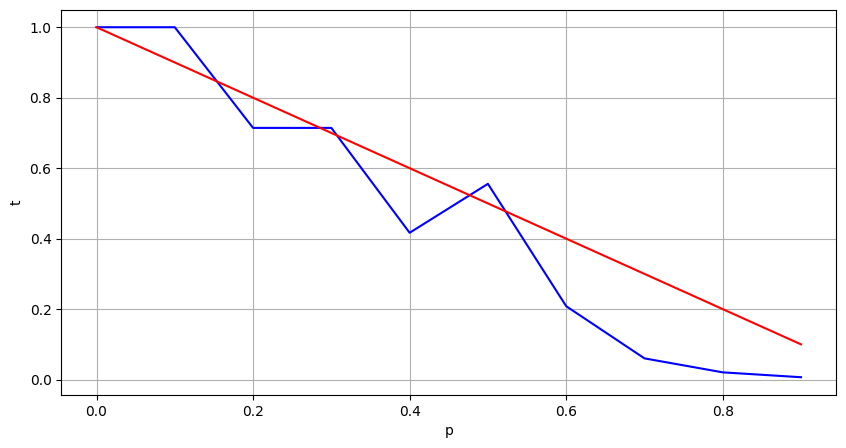

In [172]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(P_arr, MESSAGES / np.asarray(t_tests), color='b')
plt.plot(P_arr, 1 - P_arr, color='r')
plt.title('')
plt.xlabel('p')
plt.ylabel('t')
plt.grid(True)

plt.show()